In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/bank-vole'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data
### from:
Lavrinienko, Anton, Eugene Tukalenko, Tapio Mappes, and Phillip C. Watts.

"Skin and gut microbiomes of a wild mammal respond to different environmental cues."

Microbiome 6, no. 1 (2018): 1-16.

https://doi.org/10.1186/s40168-018-0595-0

In [7]:
dat=ca.read_amplicon('./all.vole.biom',
                    './map.vole.txt',
                    min_reads=1000,
                    normalize=10000)

2022-07-01 14:38:39 INFO loaded 430 samples, 15454 features
2022-07-01 14:38:40 WARNING These have metadata but do not have data - dropped (1): {'ERR2722536'}
2022-07-01 14:38:40 WARNING Do you forget to normalize your data? It is required before running this function
2022-07-01 14:38:40 INFO After filtering, 430 remain.


In [8]:
dat=cu.filter_16s(dat)

In [9]:
datc=dat.cluster_features(10)

2022-07-01 14:38:40 INFO After filtering, 7696 remain.


# We will look at the skin samples

In [10]:
skin=datc.filter_samples('sample_type','skin')

# Compare the two collection locations

In [11]:
dd=skin.diff_abundance('loc2','near Kyiv','inside CEZ', random_seed=2022)

2022-07-01 14:38:49 INFO 155 samples with both values
2022-07-01 14:38:49 INFO After filtering, 7551 remain.
2022-07-01 14:38:49 INFO 46 samples with value 1 (['near Kyiv'])
2022-07-01 14:38:55 INFO number of higher in near Kyiv: 327. number of higher in inside CEZ : 1203. total 1530


2022-07-01 14:38:55 INFO Getting dbBact annotations for 1530 sequences, please wait...
2022-07-01 14:38:55 INFO Limited to maximal annotationid: 7440
2022-07-01 14:39:03 INFO got 4813 annotations
2022-07-01 14:39:03 WARNING ignoring 2 annotation with id > max_id 7440
2022-07-01 14:39:03 INFO Got 55019 annotation-sequence pairs
2022-07-01 14:39:03 INFO Added annotation data to experiment. Total 4811 annotations, 1530 ASVs
2022-07-01 14:39:03 INFO Found 1 experiments ([423]) matching current experiment - ignoring them.
2022-07-01 14:39:09 INFO found 7 negative
2022-07-01 14:39:19 INFO found 7 positive


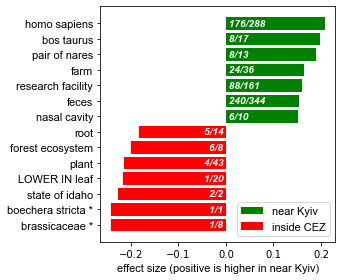

In [12]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [13]:
f.figure.savefig('./fig-terms-location.pdf')

In [16]:
e.save('./table-terms-location')

2022-06-26 15:00:09 INFO Metadata field taxonomy not found. Saving biom table without metadata


2022-06-26 15:00:13 INFO Found 1 experiments ([423]) matching current experiment - ignoring them.
2022-06-26 15:00:13 INFO found 69 annotations with the term ['plant']
2022-06-26 15:00:30 INFO ignored 0 annotations
2022-06-26 15:00:30 WARNING Clipped term circle size to 1000. Real size (number of term seqs not overlapping) should be: 8722


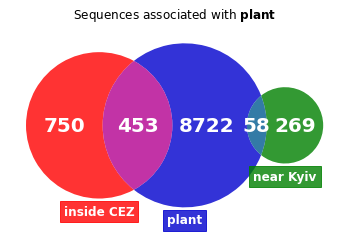

In [17]:
f=db.plot_term_venn_all('plant',dd,max_size=1000, ignore_exp=True,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':20},max_id=7440)

In [18]:
f.savefig('./fig-venn-plant.pdf')